In [1]:
import numpy as np                                     
import matplotlib.pyplot as plt                      
import seaborn as sns                                
from iminuit import Minuit                      
import sys             
from sympy import *                           
from scipy import stats
from scipy.special import binom as binomcoef
from scipy.special import expit, gamma
from scipy.integrate import trapz, simpson
import scipy.interpolate as scint
import pandas as pd
import os
import nestle
from importlib import reload

plt.style.use("../KD_style.mplstyle")

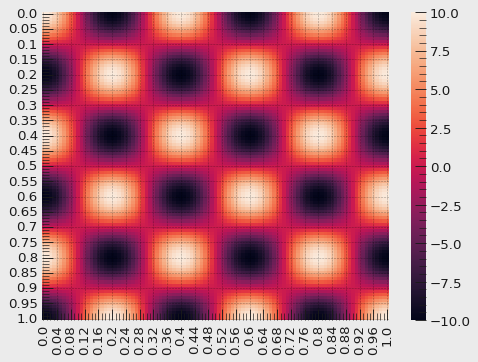

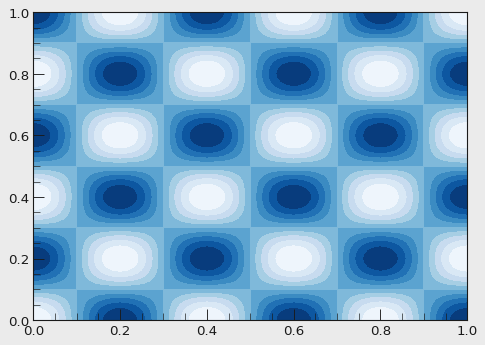

In [2]:

def llh(theta):
    return 10* np.cos(theta[0]*np.pi*5) * np.cos(theta[1]*np.pi*5)

t1_range = np.round(np.linspace(0, 1, 101),3)
t2_range = np.round(np.linspace(0, 1, 101),3)
mesh = np.meshgrid(t1_range, t2_range)
xx, yy = mesh
Z = llh(np.array([xx, yy]))
data_df = pd.DataFrame(Z, columns = t1_range, index = t2_range)
sns.heatmap(data_df)
plt.show()

plt.contourf(xx, yy, Z, 12, cmap=plt.cm.Blues_r)
plt.grid(False)

In [27]:
def prior_transform(x):
    return x
scale12 = 7*np.pi
scale3 = 3
mu = 0.68
sigma = 0.04
def llh(theta):
    return 3*(np.cos(theta[0]*scale12)*np.cos(theta[1]*scale12) + stats.norm.pdf(theta[2]*scale3, mu, sigma)*np.cos(theta[1]*scale12/2) + 3)

result = nestle.sample(llh, prior_transform, 3, npoints = 1000, method = "multi")
samples = result.samples.T



In [61]:
a = np.zeros((3,3))
np.fill_diagonal(a, [scale12, scale12, scale3])
samples_scaled = (samples.T@a).T
print(samples_scaled.T)

[[ 8.4337923   6.43168736  0.69281942]
 [ 1.06649257 18.64289609  0.6718928 ]
 [15.28742644  6.81843784  0.65442902]
 ...
 [12.13106706  0.03339818  0.68610466]
 [ 6.64628462 12.48297015  0.67634024]
 [ 0.1743441  12.8688239   0.6754896 ]]


[5.56212780e-27 5.18189521e-26 3.32205992e-25 ... 4.54036293e-04
 4.55341968e-04 4.55754182e-04]


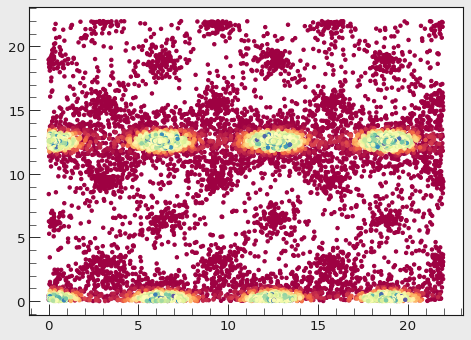

Best fit sigmas [ 6.20944873 12.54588496  0.68041672]


In [93]:
# plt.scatter(samples[0]*7*np.pi, samples[2]*3, alpha=result.weights/np.max(result.weights))
# samples_sorted = samples_scaled[np.array(list(sorted(zip(result.weights, list(range(len(result.weights))))))).T[1]]
inds = result.weights.argsort()
samples_sorted = (samples_scaled.T[inds]).T
print(result.weights[inds])
plt.scatter(samples_sorted[0], samples_sorted[1], c=result.weights/np.max(result.weights), cmap = "Spectral")
plt.grid(False)
plt.show()
best_sigma_scaled = samples_scaled.T[np.argmax(result.weights)]
best_sigma = samples.T[np.argmax(result.weights)]
print("Best fit sigmas", samples_scaled.T[np.argmax(result.weights)])

C:\Users\phili\AppData\Local\Temp\ipykernel_1264\2773040006.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z = llh(np.array([xx, yy, best_sigma[2]]))


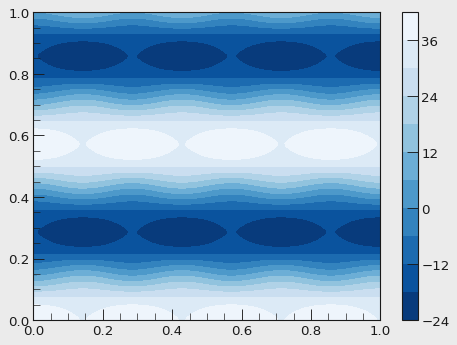

In [92]:
t1_range = np.round(np.linspace(0, 1, 200),3)
t2_range = np.round(np.linspace(0, 1, 200),3)
mesh = np.meshgrid(t1_range, t2_range)
xx, yy = mesh
Z = llh(np.array([xx, yy, best_sigma[2]]))
fig, ax = plt.subplots()
conf = ax.contourf(xx, yy, Z, 12, cmap=plt.cm.Blues_r)
cbar = fig.colorbar(conf)
plt.grid(False)

C:\Users\phili\AppData\Local\Temp\ipykernel_1264\3894840202.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z = llh(np.array([xx, yy, best_sigma[2]]))


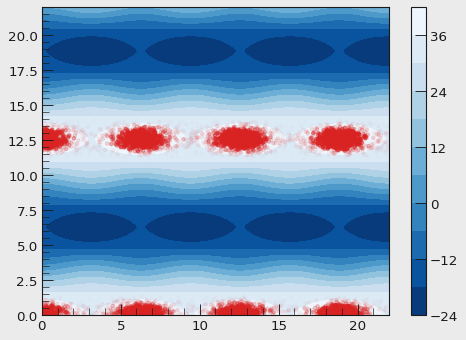

In [95]:
t1_range = np.round(np.linspace(0, 1, 200),3)
t2_range = np.round(np.linspace(0, 1, 200),3)
mesh = np.meshgrid(t1_range, t2_range)
xx, yy = mesh
Z = llh(np.array([xx, yy, best_sigma[2]]))
fig, ax = plt.subplots()
conf = ax.contourf(xx*scale12, yy*scale12, Z, 10, cmap=plt.cm.Blues_r)
cbar = fig.colorbar(conf)
plt.grid(False)
ax.scatter(samples_sorted[0], samples_sorted[1], alpha=result.weights/np.max(result.weights))

C:\Users\phili\AppData\Local\Temp\ipykernel_1264\551725307.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z = llh(np.array([xx, best_sigma[1], yy]))


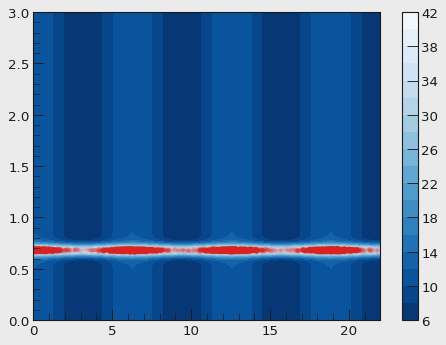

In [97]:
t1_range = np.round(np.linspace(0, 1, 200),3)
t3_range = np.round(np.linspace(0, 1, 200),3)
mesh = np.meshgrid(t1_range, t3_range)
xx, yy = mesh
Z = llh(np.array([xx, best_sigma[1], yy]))
fig, ax = plt.subplots()
conf = ax.contourf(xx*scale12, yy*scale3, Z, 20, cmap=plt.cm.Blues_r)
cbar = fig.colorbar(conf)
plt.grid(False)
ax.scatter(samples_sorted[0], samples_sorted[2], alpha=result.weights/np.max(result.weights))